Connected to Python 3.12.0

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

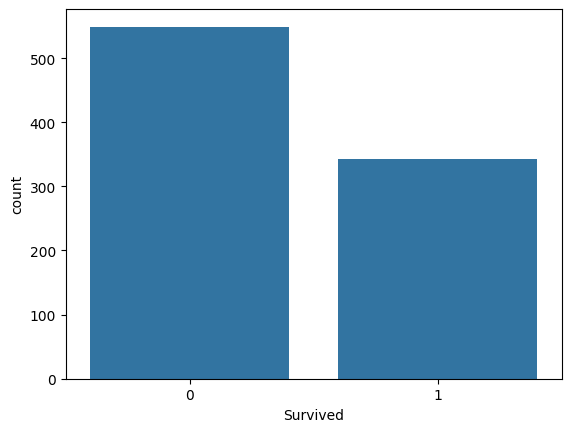

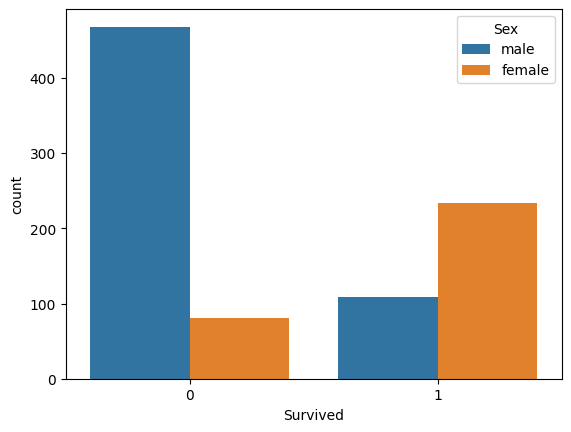

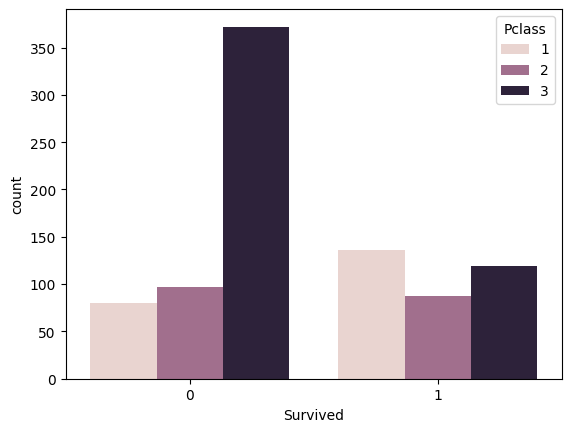

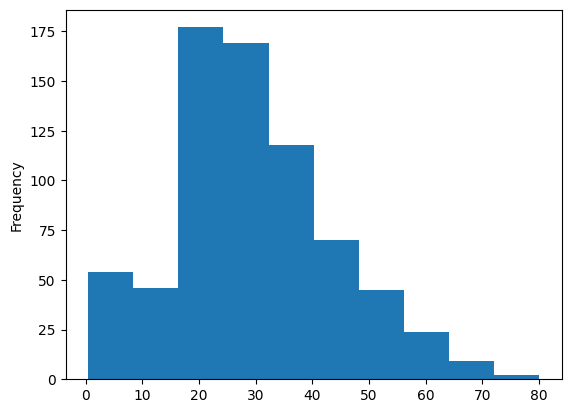

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,True,False,True,False,False
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,True,False,True,False,True
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,False,False,True,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,False,False,False,True,False
10,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,False,False,True,False,True


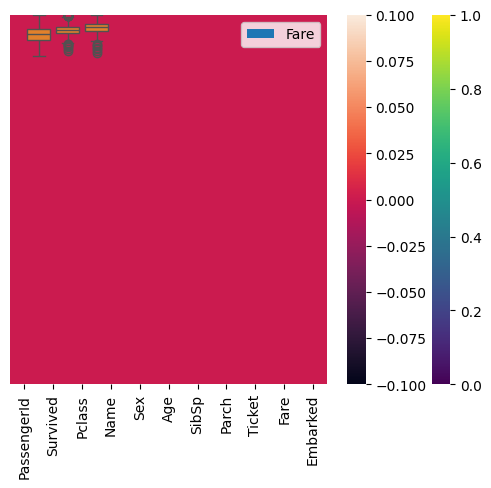

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn.linear_model as sk
Titanic_data= pd.read_csv(r'C:\Users\timok\Downloads\4aa5b471860321d7b47fd881898162b7-6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f\titanic_dataset.csv')
print(Titanic_data.head(10))
##Data analysis
#analysis how many survivals in the ship

sns.countplot(x="Survived",data=Titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Sex", data=Titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Pclass", data=Titanic_data)
plt.show()
Titanic_data["Age"].plot.hist()
plt.show()
Titanic_data.info()
Titanic_data["Fare"].plot.hist()
sns.countplot(x="SibSp",data=Titanic_data)
##data wrangling

Titanic_data.isnull()
Titanic_data.isnull().sum()
sns.heatmap(Titanic_data.isnull(), yticklabels=False, cmap="viridis")
sns.boxplot(x='Pclass',y='Age', data=Titanic_data)
Titanic_data.drop("Cabin", axis=1, inplace=True)
Titanic_data.head(5)
Titanic_data.dropna(inplace=True)
sns.heatmap(Titanic_data.isnull(),yticklabels=False)
Titanic_data.isnull().sum()
sex=pd.get_dummies(Titanic_data["Sex"], drop_first=True)
sex.head()
embark=pd.get_dummies(Titanic_data["Embarked"], drop_first=True)
embark.head(5)
plc=pd.get_dummies(Titanic_data["Pclass"], drop_first=True)
plc.head(5)
Titanic_data=pd.concat([Titanic_data,sex,embark,plc],axis=1)
Titanic_data.head(10)
Titanic_data.drop(['Sex','Embarked','PassengerId','Ticket'],axis=1,inplace=True)
Titanic_data.head(10)

<Axes: xlabel='Pclass', ylabel='Age'>

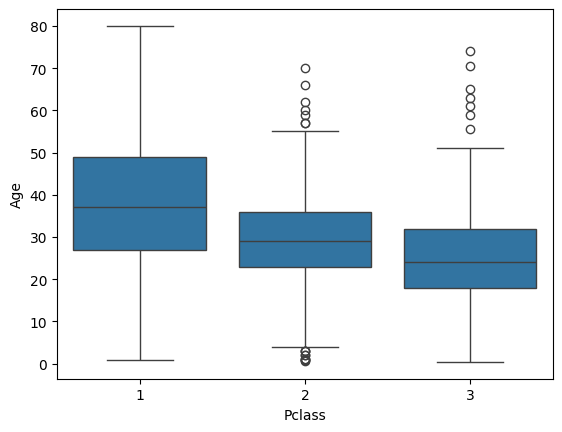

In [6]:
sns.boxplot(x='Pclass',y='Age', data=Titanic_data)

In [7]:
Titanic_data.drop("Cabin", axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [8]:
Titanic_data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True


In [9]:
Titanic_data.dropna(inplace=True)

<Axes: >

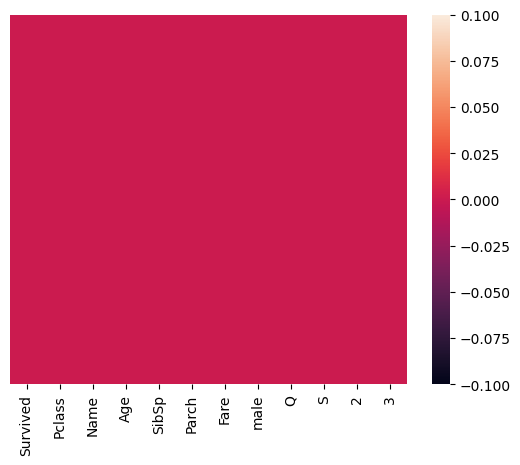

In [10]:
sns.heatmap(Titanic_data.isnull(),yticklabels=False)

In [11]:
Titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [12]:
sex=pd.get_dummies(Titanic_data["Sex"], drop_first=True)

KeyError: 'Sex'

In [13]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [14]:
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [15]:
plc.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [16]:
Titanic_data.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,True,False,True,False,False
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,True,False,True,False,True
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,False,False,True,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,False,False,False,True,False
10,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,False,False,True,False,True


In [17]:
Titanic_data.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,True,False,True,False,False
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,True,False,True,False,True
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,False,False,True,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,False,False,False,True,False
10,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,False,False,True,False,True


In [18]:
Titanic_data.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,True,False,True,False,False
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,True,False,True,False,True
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,False,False,True,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,False,False,False,True,False
10,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,False,False,True,False,True


In [19]:
Titanic_data.drop(['Sex','Embarked','PassengerId','Ticket','Name','Pclass'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked', 'PassengerId', 'Ticket'] not found in axis"

In [20]:
Titanic_data.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False,True
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,True,False,True,False,False
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,True,False,True,False,True
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,False,False,True,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,False,False,False,True,False
10,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,False,False,True,False,True


In [21]:
Titanic_data.drop(['Name','Pclass'])

KeyError: "['Name', 'Pclass'] not found in axis"

In [22]:
Titanic_data.drop(['Name','Pclass'],axis=1,inplace=True)

In [23]:
Titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [25]:
import sklearn as skl

In [27]:
x= Titanic_data.drop(['Survived'], axis=1)

In [30]:
y= Titanic_data["Survived"]

In [33]:
from sklearn cross_validation import train_test_split

SyntaxError: invalid syntax (<ipython-input-33-b3bc01403ecf>, line 1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [36]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [37]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test test_size=0.2 random_state=0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-40-49bc3c2e1c6e>, line 1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2 random_state=0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-41-1c710113461d>, line 1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [43]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
188,40.0,1,1,15.5000,True,True,False,False,True
119,2.0,4,2,31.2750,False,False,True,False,True
754,48.0,1,2,65.0000,False,False,True,True,False
550,17.0,0,2,110.8833,True,False,False,False,False
713,29.0,0,0,9.4833,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...
380,42.0,0,0,227.5250,False,False,False,False,False
508,28.0,0,0,22.5250,True,False,True,False,True
847,35.0,0,0,7.8958,True,False,False,False,True
402,21.0,1,0,9.8250,False,False,True,False,True


In [44]:
y_test

236    0
163    0
80     0
142    1
331    0
      ..
746    0
7      0
728    0
455    1
662    0
Name: Survived, Length: 143, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [46]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.6500,True,False,True,False,True
642,2.0,3,2,27.9000,False,False,True,False,True
434,50.0,1,0,55.9000,True,False,True,False,False
203,45.5,0,0,7.2250,True,False,False,False,True
586,47.0,0,0,15.0000,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
182,9.0,4,2,31.3875,True,False,True,False,True
809,33.0,1,0,53.1000,False,False,True,False,False
94,59.0,0,0,7.2500,True,False,True,False,True
292,36.0,0,0,12.8750,True,False,False,True,False


In [47]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.6500,True,False,True,False,True
642,2.0,3,2,27.9000,False,False,True,False,True
434,50.0,1,0,55.9000,True,False,True,False,False
203,45.5,0,0,7.2250,True,False,False,False,True
586,47.0,0,0,15.0000,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
182,9.0,4,2,31.3875,True,False,True,False,True
809,33.0,1,0,53.1000,False,False,True,False,False
94,59.0,0,0,7.2500,True,False,True,False,True
292,36.0,0,0,12.8750,True,False,False,True,False


In [48]:
y_test

689    1
279    1
508    0
9      1
496    1
      ..
854    0
336    0
385    0
397    0
280    0
Name: Survived, Length: 214, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
LogisticRegression()

LogisticRegression()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

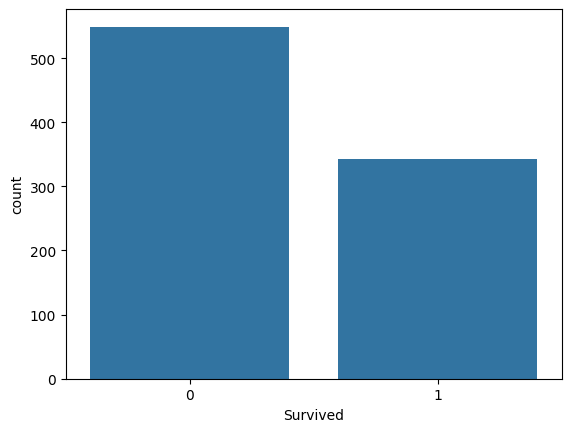

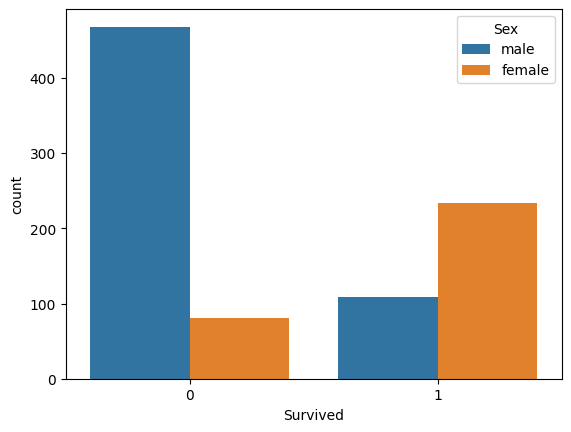

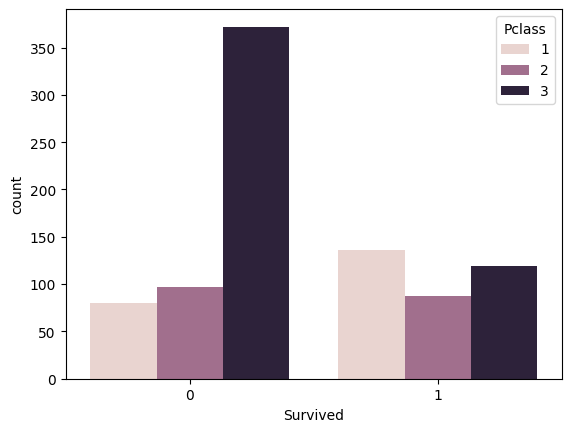

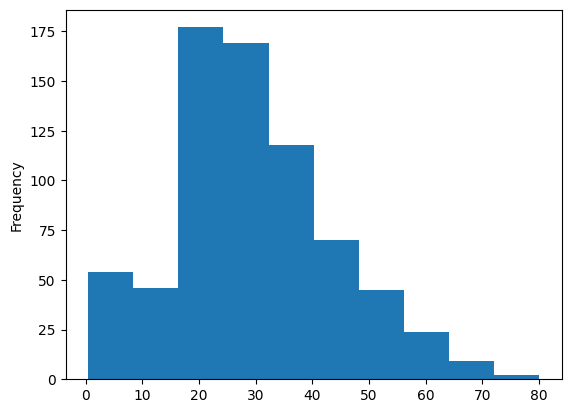

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='Frequency'>

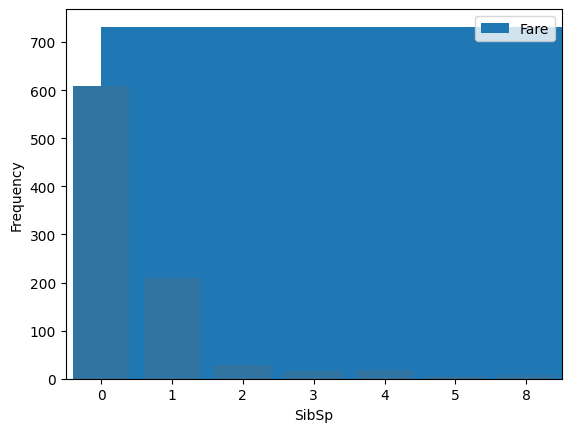

In [7]:
Titanic_data= pd.read_csv(r'C:\Users\timok\Downloads\4aa5b471860321d7b47fd881898162b7-6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f\titanic_dataset.csv')
print(Titanic_data.head(10))
##Data analysis
#analysis how many survivals in the ship

sns.countplot(x="Survived",data=Titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Sex", data=Titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Pclass", data=Titanic_data)
plt.show()
Titanic_data["Age"].plot.hist()
plt.show()
Titanic_data.info()
Titanic_data["Fare"].plot.hist()
sns.countplot(x="SibSp",data=Titanic_data)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


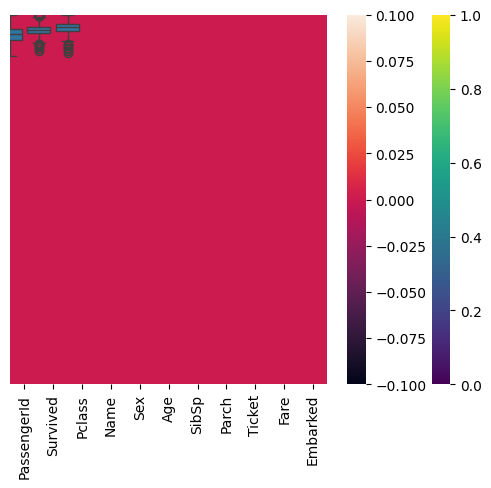

In [8]:
Titanic_data.isnull()
Titanic_data.isnull().sum()
sns.heatmap(Titanic_data.isnull(), yticklabels=False, cmap="viridis")
sns.boxplot(x='Pclass',y='Age', data=Titanic_data)
Titanic_data.drop("Cabin", axis=1, inplace=True)
Titanic_data.head(5)
Titanic_data.dropna(inplace=True)
sns.heatmap(Titanic_data.isnull(),yticklabels=False)
Titanic_data.isnull().sum()
sex=pd.get_dummies(Titanic_data["Sex"], drop_first=True)
sex.head()
embark=pd.get_dummies(Titanic_data["Embarked"], drop_first=True)
embark.head(5)
plc=pd.get_dummies(Titanic_data["Pclass"], drop_first=True)
plc.head(5)
Titanic_data=pd.concat([Titanic_data,sex,embark,plc],axis=1)
Titanic_data.head(10)
Titanic_data.drop(['Sex','Embarked','PassengerId','Ticket',],axis=1,inplace=True)
Titanic_data.head(10)
Titanic_data.drop(['Name','Pclass'],axis=1,inplace=True)
Titanic_data.head(5)

In [10]:
import sklearn as skl

In [11]:
x= Titanic_data.drop(['Survived'], axis=1)

In [12]:
y= Titanic_data["Survived"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [15]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.6500,True,False,True,False,True
642,2.0,3,2,27.9000,False,False,True,False,True
434,50.0,1,0,55.9000,True,False,True,False,False
203,45.5,0,0,7.2250,True,False,False,False,True
586,47.0,0,0,15.0000,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
182,9.0,4,2,31.3875,True,False,True,False,True
809,33.0,1,0,53.1000,False,False,True,False,False
94,59.0,0,0,7.2500,True,False,True,False,True
292,36.0,0,0,12.8750,True,False,False,True,False


In [16]:
y_train

699    0
642    0
434    0
203    0
586    0
      ..
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 498, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression